In [3]:
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from tqdm import tqdm

In [4]:
from utils import accuracy_fn, plot_decision_boundary

In [3]:
from torch.utils.data import DataLoader, TensorDataset

In [4]:
# Crie um conjunto de dados fictício com dois círculos
cmap_ = ListedColormap(['#ee3737', '#198bd9'])
X, y = make_circles(n_samples=1000, factor=0.1, noise=0.1)  # aumente o factor e/ou o noise para aumentar a dificuldade
data = np.hstack((X,y.reshape(-1,1)))

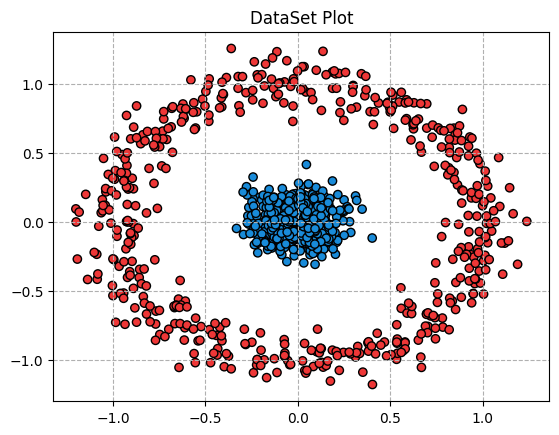

In [5]:
fig, ax = plt.subplots()
ax.scatter(x=data[:, 0], y=data[:, 1], c=data[:, 2], cmap=cmap_, edgecolors='k')
ax.set_title('DataSet Plot')
plt.grid(True, linestyle='dashed')
plt.show()

In [6]:
# Transformando os dados em tensores torch
X = torch.tensor(X)
y = torch.tensor(y)

In [7]:
# separando em treino e teste
n_samples_train = int(0.8 * X.shape[0])
n_samples_test = int(X.shape[0] - n_samples_train)

X_train = X[:n_samples_train, :]
X_train = X_train.to(dtype=torch.float32)
y_train = y[:n_samples_train]
y_train = y_train.to(dtype=torch.float32)

X_test = X[:n_samples_test, :]
X_test = X_test.to(dtype=torch.float32)
y_test = y[:n_samples_test]
y_test = y_test.to(dtype=torch.float32)

In [8]:
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

batch_size_test = len(test_data.tensors[0])

train_loader = DataLoader(train_data, shuffle=True, batch_size=12)
test_loader = DataLoader(test_data, batch_size=batch_size_test)

In [9]:
# 1. Construct a model class that subclasses nn.Module
class CircleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=4)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(in_features=4, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.sigmoid(self.layer_2(x))
        return x.squeeze(1)

model = CircleNN()

In [10]:
# ajustando a loss (BCE) e o otimizador (SGD)
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

  0%|                                                                                         | 0/1500 [00:00<?, ?it/s]

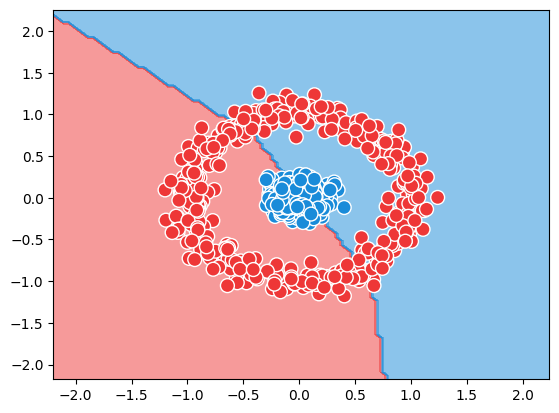

  0%|▏                                                                                | 4/1500 [00:00<04:00,  6.21it/s]

Epoch: 0 | Loss: 0.72195, Accuracy: 25.00% | Test loss: 0.67669, Test acc: 51.00%


  7%|█████▎                                                                         | 100/1500 [00:04<00:53, 26.03it/s]

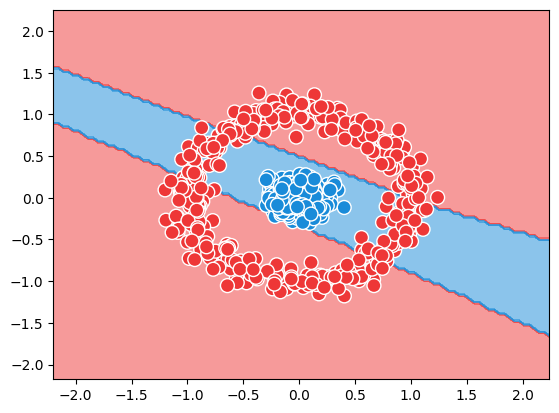

  7%|█████▌                                                                         | 106/1500 [00:04<01:11, 19.58it/s]

Epoch: 100 | Loss: 0.25042, Accuracy: 100.00% | Test loss: 0.36267, Test acc: 89.00%


 13%|██████████▍                                                                    | 199/1500 [00:08<00:55, 23.24it/s]

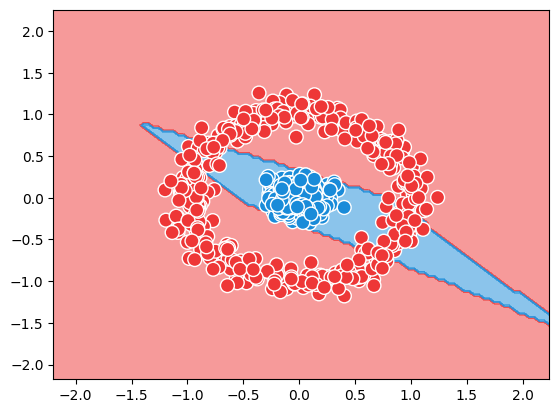

 14%|██████████▊                                                                    | 205/1500 [00:09<01:09, 18.56it/s]

Epoch: 200 | Loss: 0.20857, Accuracy: 100.00% | Test loss: 0.18332, Test acc: 93.00%


 20%|███████████████▋                                                               | 298/1500 [00:12<00:44, 27.00it/s]

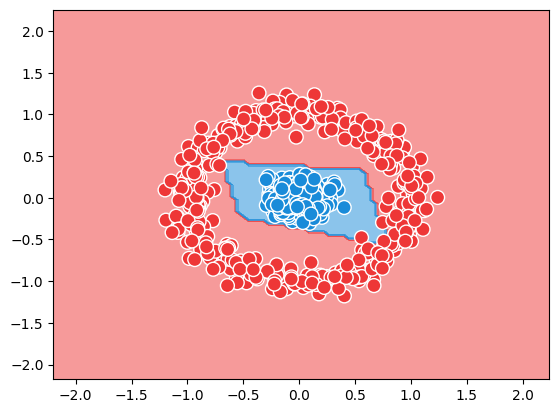

 20%|████████████████                                                               | 304/1500 [00:13<00:59, 19.94it/s]

Epoch: 300 | Loss: 0.01613, Accuracy: 100.00% | Test loss: 0.04852, Test acc: 100.00%


 27%|█████████████████████                                                          | 400/1500 [00:16<00:42, 25.64it/s]

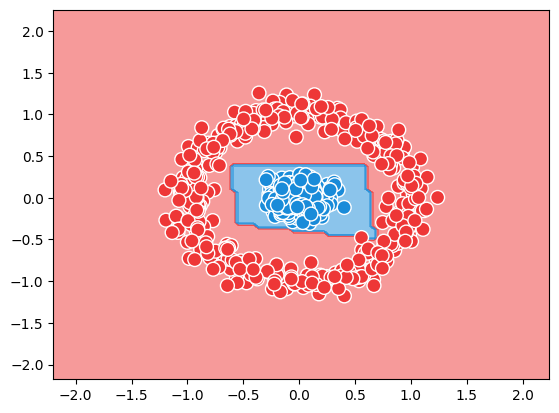

 27%|█████████████████████▍                                                         | 406/1500 [00:17<00:55, 19.56it/s]

Epoch: 400 | Loss: 0.04579, Accuracy: 100.00% | Test loss: 0.02402, Test acc: 100.00%


 33%|██████████████████████████▎                                                    | 499/1500 [00:20<00:38, 26.25it/s]

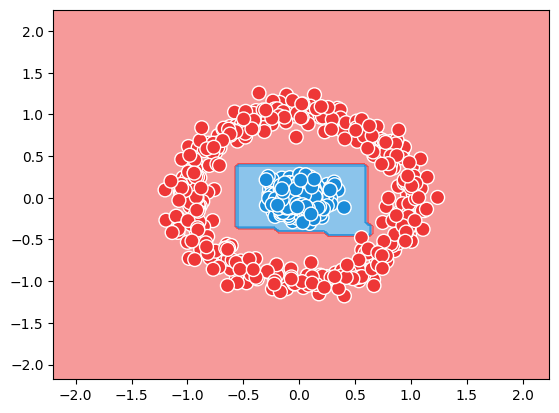

 34%|██████████████████████████▌                                                    | 505/1500 [00:21<00:49, 20.01it/s]

Epoch: 500 | Loss: 0.03373, Accuracy: 100.00% | Test loss: 0.01584, Test acc: 100.00%


 40%|███████████████████████████████▍                                               | 598/1500 [00:24<00:36, 24.89it/s]

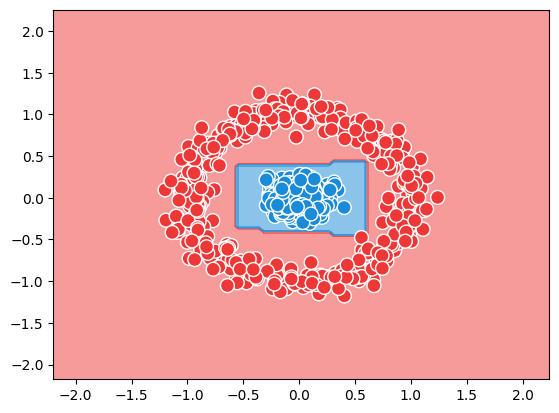

 40%|███████████████████████████████▊                                               | 604/1500 [00:25<00:46, 19.35it/s]

Epoch: 600 | Loss: 0.00889, Accuracy: 100.00% | Test loss: 0.01186, Test acc: 100.00%


 47%|████████████████████████████████████▊                                          | 700/1500 [00:28<00:29, 27.31it/s]

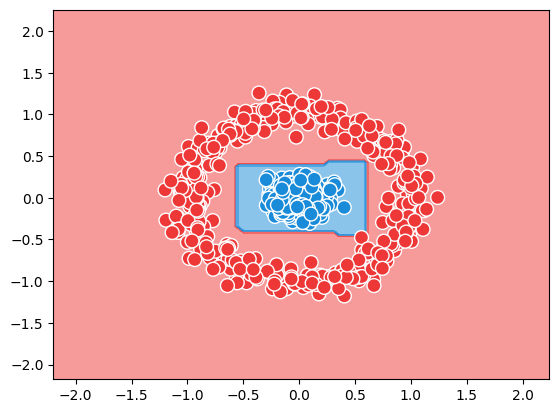

 47%|█████████████████████████████████████                                          | 703/1500 [00:29<00:43, 18.48it/s]

Epoch: 700 | Loss: 0.01529, Accuracy: 100.00% | Test loss: 0.00947, Test acc: 100.00%


 53%|██████████████████████████████████████████                                     | 799/1500 [00:32<00:25, 27.21it/s]

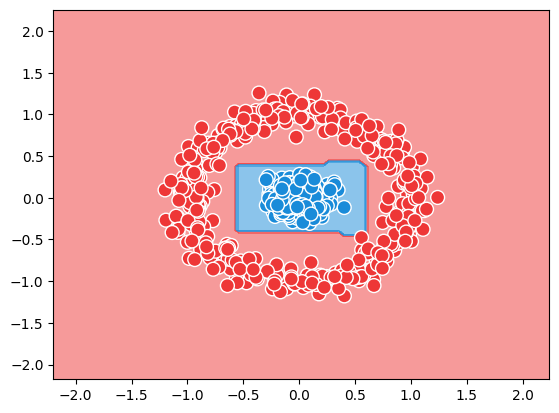

 54%|██████████████████████████████████████████▍                                    | 805/1500 [00:33<00:37, 18.62it/s]

Epoch: 800 | Loss: 0.00273, Accuracy: 100.00% | Test loss: 0.00787, Test acc: 100.00%


 60%|███████████████████████████████████████████████▎                               | 898/1500 [00:36<00:22, 26.94it/s]

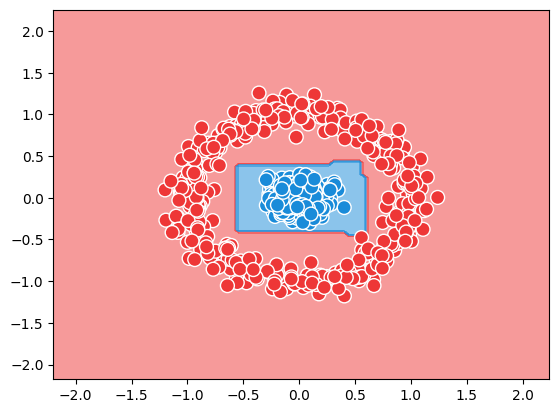

 60%|███████████████████████████████████████████████▌                               | 904/1500 [00:37<00:29, 20.16it/s]

Epoch: 900 | Loss: 0.00291, Accuracy: 100.00% | Test loss: 0.00671, Test acc: 100.00%


 67%|████████████████████████████████████████████████████                          | 1000/1500 [00:40<00:18, 26.82it/s]

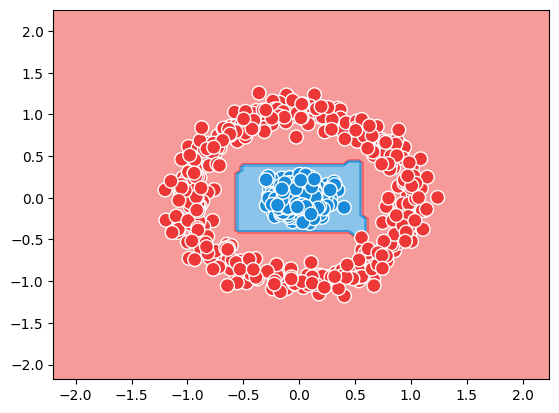

 67%|████████████████████████████████████████████████████▎                         | 1006/1500 [00:41<00:24, 20.44it/s]

Epoch: 1000 | Loss: 0.00531, Accuracy: 100.00% | Test loss: 0.00584, Test acc: 100.00%


 73%|█████████████████████████████████████████████████████████▏                    | 1099/1500 [00:44<00:15, 25.79it/s]

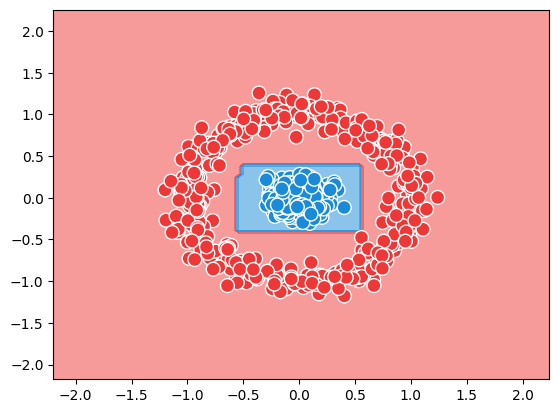

 74%|█████████████████████████████████████████████████████████▍                    | 1105/1500 [00:45<00:20, 19.55it/s]

Epoch: 1100 | Loss: 0.00571, Accuracy: 100.00% | Test loss: 0.00516, Test acc: 100.00%


 80%|██████████████████████████████████████████████████████████████▎               | 1198/1500 [00:48<00:13, 21.83it/s]

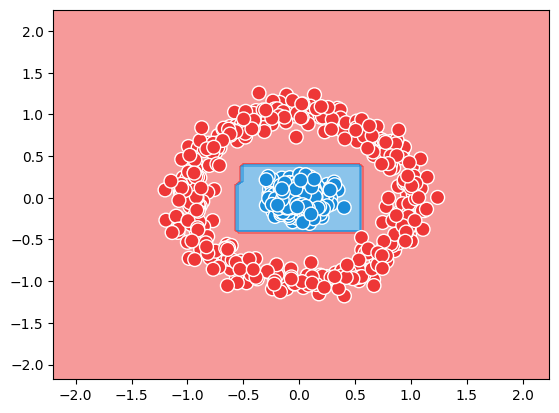

 80%|██████████████████████████████████████████████████████████████▌               | 1204/1500 [00:49<00:16, 18.19it/s]

Epoch: 1200 | Loss: 0.00222, Accuracy: 100.00% | Test loss: 0.00462, Test acc: 100.00%


 87%|███████████████████████████████████████████████████████████████████▌          | 1300/1500 [00:53<00:08, 24.28it/s]

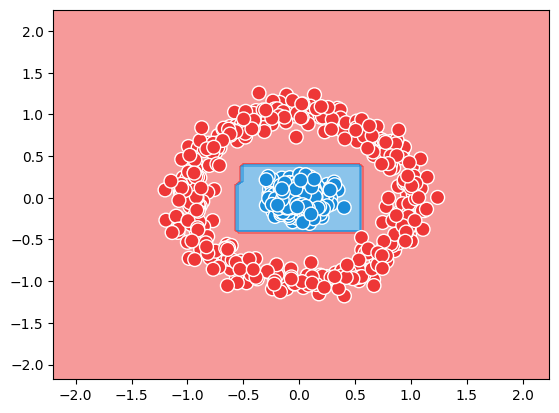

 87%|███████████████████████████████████████████████████████████████████▊          | 1303/1500 [00:53<00:11, 17.35it/s]

Epoch: 1300 | Loss: 0.00217, Accuracy: 100.00% | Test loss: 0.00419, Test acc: 100.00%


 93%|████████████████████████████████████████████████████████████████████████▋     | 1399/1500 [00:57<00:03, 25.26it/s]

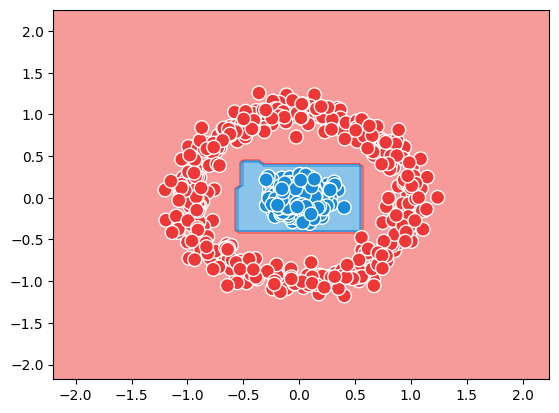

 94%|█████████████████████████████████████████████████████████████████████████     | 1405/1500 [00:57<00:05, 16.93it/s]

Epoch: 1400 | Loss: 0.00790, Accuracy: 100.00% | Test loss: 0.00382, Test acc: 100.00%


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [01:01<00:00, 24.31it/s]


In [12]:
EPOCHS = 1500

for epoch in tqdm(range(EPOCHS)):
    # Train set
    model.train()
    for X, y in train_loader:
        
        y_logits = model(X)
        y_pred = torch.round(y_logits)

        loss = loss_fn(y_logits, y) 
        acc = accuracy_fn(y_true=y, y_pred=y_pred) 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        model.eval()
        # Test set
        X_test, y_test = next(iter(test_loader))
        test_logits = model(X_test)
        test_pred = torch.round(test_logits)
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch %100 == 0:
        plot_decision_boundary(model=model, color_map=cmap_, s=100, dataset=train_data, cols=[0, 1])
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

In [14]:
ex_1 = torch.tensor([[0.11322397,  0.17248329]], dtype=torch.float32)
ex_0 = torch.tensor([[-0.32296138,  0.83740141]], dtype=torch.float32)

model.eval()
with torch.no_grad():
    y_pred_0 = model(ex_0)
    y_pred_1 = model(ex_1)

In [15]:
print(f'Deve ser 0, foi: {torch.round(y_pred_0)} | predição: {y_pred_0.item()}')
print(f'Deve ser 1, foi: {torch.round(y_pred_1)} | predição: {y_pred_1.item()}')

Deve ser 0, foi: tensor([0.]) | predição: 4.125482519157231e-05
Deve ser 1, foi: tensor([1.]) | predição: 0.9973952770233154
